In [1]:
import pandas as pd
from io import StringIO

In [2]:
csv_data="""
          A,B,C,D
          1.0,2.0,3.0,4.0
          5.0,6.0,,8.0
          10.0,11.0,12.0,
          """

In [3]:
df=pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [4]:
df.isnull().sum()

          A    0
B              0
C              1
D              1
dtype: int64

In [5]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [6]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [8]:
# 只删除所有列都是NaN的行
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [9]:
# 删除少于4个真实值的行
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
# 只删除NaN出现在特定列中的行
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [11]:
from sklearn.preprocessing import Imputer
imr=Imputer(missing_values='NaN',strategy='mean',axis=0)

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [12]:
imr=imr.fit(df.values)

In [13]:
imputed_data=imr.transform(df.values)

In [14]:
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [15]:
# categorical features
df=pd.DataFrame([
    ['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']
])

In [16]:
df.columns=['color','size','price','classlabel']

In [17]:
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [18]:
size_mapping={'XL':3,'L':2,'M':1}
df['size']=df['size'].map(size_mapping)

In [19]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [20]:
inv_size_mapping={v:k for k,v in size_mapping.items()}

In [21]:
inv_size_mapping

{3: 'XL', 2: 'L', 1: 'M'}

In [22]:
size_mapping.items()

dict_items([('XL', 3), ('L', 2), ('M', 1)])

In [23]:
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [24]:
import numpy as np

In [25]:
class_mapping={label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [26]:
df['classlabel'].unique()

array(['class1', 'class2'], dtype=object)

In [27]:
df['classlabel']=df['classlabel'].map(class_mapping)

In [28]:
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [29]:
inv_class_mapping={v:k for k,v in class_mapping.items()}

In [30]:
df['classlabel']=df['classlabel'].map(inv_class_mapping)

In [31]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
class_le=LabelEncoder()

In [34]:
y=class_le.fit_transform(df['classlabel'].values)

In [35]:
y

array([0, 1, 0])

In [36]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

In [37]:
X=df[['color','size','price']].values
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [38]:
color_le=LabelEncoder()

In [39]:
X[:,0]=color_le.fit_transform(X[:,0])

In [40]:
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [41]:
from sklearn.preprocessing import  LabelEncoder,OneHotEncoder
ohe=OneHotEncoder(sparse=False)
le=LabelEncoder()

In [42]:
new_color_features = le.fit_transform(X[:,0])
new_color_features

array([1, 2, 0])

In [43]:
new_color_features.reshape(-1,1)

array([[1],
       [2],
       [0]])

In [44]:
ohe.fit_transform(new_color_features.reshape(-1,1))[:,1:]

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0.],
       [0., 1.],
       [0., 0.]])

In [45]:
print(ohe.fit_transform(new_color_features.reshape(-1,1)))

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [46]:
pd.get_dummies(df[['price','color','size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [47]:
pd.get_dummies(df[['price','color','size']],drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [48]:
# training and test datasets
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/wine/wine.data',
         header=None)

In [49]:
df_wine.columns=['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
                'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity',
                'Hue','OD280/OD315 of diluted wines','Proline']

In [50]:
print('Class labels',np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [51]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

In [55]:
# feature scaling 
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
X_train_norm=mms.fit_transform(X_train)
X_test_norm=mms.transform(X_test)

In [56]:
ex=np.array([0,1,2,3,4,5])
print('standardized:',(ex-ex.mean())/ex.std())

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [57]:
print('normalized:',(ex-ex.min())/(ex.max()-ex.min()))

normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [58]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()

In [59]:
X_train_std=stdsc.fit_transform(X_train)
X_test_std=stdsc.fit_transform(X_test)

In [60]:
# L1范数
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
lr = LogisticRegression(penalty='l1',C=1.0)
lr.fit(X_train_std,y_train)

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
print('Training accuracy:',lr.score(X_test_std,y_test))

Training accuracy: 1.0


In [63]:
lr.intercept_

array([-1.26349335, -1.21577964, -2.37016504])

In [64]:
lr.coef_
# 每个类有一个权重向量，每行由13个权重组成，权重和特征的线性组合 = net input

array([[ 1.24590209,  0.18045511,  0.74484226, -1.16261261,  0.        ,
         0.        ,  1.164851  ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55216857,  2.50967206],
       [-1.53904038, -0.3857984 , -0.99549246,  0.36374029, -0.0587717 ,
         0.        ,  0.66701883,  0.        ,  0.        , -1.93178763,
         1.23800653,  0.        , -2.23320574],
       [ 0.13539433,  0.16869323,  0.35724729,  0.        ,  0.        ,
         0.        , -2.4371298 ,  0.        ,  0.        ,  1.56327741,
        -0.81830495, -0.49356943,  0.        ]])

In [65]:
# 改变正则化强度，观察权重的变化
import matplotlib.pyplot as plt


In [66]:
colors=['blue','green','red','cyan','magenta','yellow','black','pink','lightgreen','lightblue','gray','indigo','orange']

In [67]:
weights,params=[],[]
for c in np.arange(-4,6):
    lr=LogisticRegression(penalty='l1',C=10.**c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

In [68]:
weights=np.array(weights)

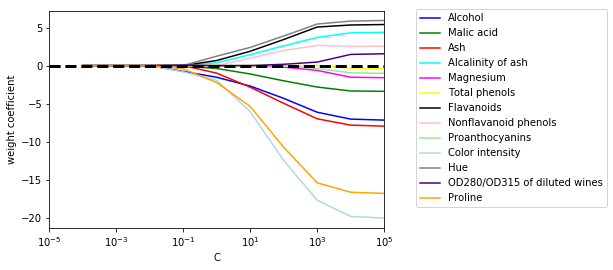

In [69]:
fig = plt.figure()
ax = plt.subplot(111)
for column,color in zip(range(weights.shape[1]),colors):
    plt.plot(params,weights[:,column],label=df_wine.columns[column+1],color=color)
plt.axhline(0,color='black',linestyle='--',linewidth=3)
plt.xlim([10**(-5),10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',bbox_to_anchor=(1.38,1.03),ncol=1,fancybox=True)
plt.show()

In [70]:
# transform multiple columns easily using ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np

X=np.array([
            ['apple','red',1,'round',0],
            ['orange','orange',2,'round',0.1],
            ['bannana','yellow',2,'long',0],
            ['apple','green',1,'round',0.2]
           ])

ct = ColumnTransformer(
#     [('oh_enc',OneHotEncoder(sparse=False),[0,1,3]),],
    [('oh_enc',LabelEncoder(),[0]),],
    remainder='passthrough'
)

# print(ct.fit_transform(X[:,0].reshape(-1,1)))

In [71]:
# https://stackoverflow.com/questions/43588679/issue-with-onehotencoder-for-categorical-features
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

In [72]:
from itertools import combinations
from sklearn.base import clone
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [73]:
for p in combinations('abcde',3):
    print(p)

('a', 'b', 'c')
('a', 'b', 'd')
('a', 'b', 'e')
('a', 'c', 'd')
('a', 'c', 'e')
('a', 'd', 'e')
('b', 'c', 'd')
('b', 'c', 'e')
('b', 'd', 'e')
('c', 'd', 'e')


In [76]:
# python sbs
class SBS():
    def __init__(self,estimator,k_features,scoring=accuracy_score,test_size=0.25,random_state=1):
        self.scoring=scoring
        self.estimator=clone(estimator)
        self.k_features=k_features
        self.test_size=test_size
        self.random_state=random_state
        
    def fit(self,X,y):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=self.test_size,random_state=self.random_state)
        
        dim=X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score=self._calc_score(X_train,y_train,X_test,y_test,self.indices_)
        self.scores_=[score]
        
        while dim > self.k_features:
            scores=[]
            subsets=[]
            
            for p in combinations(self.indices_,r=dim-1):
                score = self._calc_score(X_train,y_train,X_test,y_test,p)
                scores.append(score)
                subsets.append(p)
            
            best=np.argmax(scores)
            self.indices_=subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_=self.scores_[-1]
        
        return self
    
    def transform(self,X):
        return X[:,self.indices_]
    
    def _calc_score(self,X_train,y_train,X_test,y_test,indices):
        self.estimator.fit(X_train[:,indices],y_train)
        y_pred=self.estimator.predict(X_test[:,indices])
        score = self.scoring(y_test,y_pred)
        return score

In [77]:
# knn algorithm with sbs
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn,k_features=1)
sbs.fit(X_train_std,y_train)

In [78]:
k_feat=[len(k) for k in sbs.subsets_]

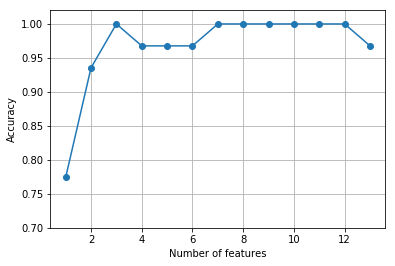

In [80]:
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.7,1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [83]:
k3=list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [85]:
knn.fit(X_train_std,y_train)
print('Training accuracy:',knn.score(X_train_std,y_train))

Training accuracy: 0.967741935483871


In [86]:
print('Test accuracy:',knn.score(X_test_std,y_test))

Test accuracy: 0.9814814814814815


In [94]:
knn.fit(X_train_std[:,k3],y_train)
print('Training accuracy:',knn.score(X_train_std[:,k3],y_train))
print('Test accuracy:',knn.score(X_test_std[:,k3],y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


 1)Proline                       0.185453
 2)Flavanoids                    0.174751
 3)Color intensity               0.143920
 4)OD280/OD315 of diluted wines  0.136162
 5)Alcohol                       0.118529
 6)Hue                           0.058739
 7)Total phenols                 0.050872
 8)Magnesium                     0.031357
 9)Malic acid                    0.025648
10)Proanthocyanins               0.025570
11)Alcalinity of ash             0.022366
12)Nonflavanoid phenols          0.013354
13)Ash                           0.013279


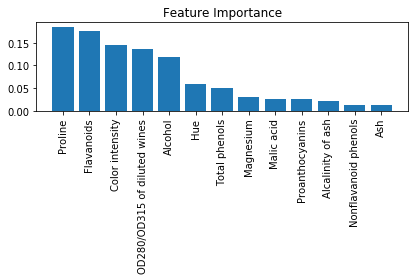

In [99]:
# assessing feature importance with random forests
from sklearn.ensemble import RandomForestClassifier
feat_labels=df_wine.columns[1:]
forest=RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train,y_train)
importances=forest.feature_importances_
indices=np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print('%2d)%-*s%f' % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),importances[indices],align='center')
plt.xticks(range(X_train.shape[1]),feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.show()

In [103]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest,threshold=0.1,prefit=True)
X_selected=sfm.transform(X_train)

In [104]:
print('Number of features that meet this threshold criterion:',X_selected.shape[1])

Number of features that meet this threshold criterion: 5


In [105]:
for f in range(X_selected.shape[1]):
    print('%2d)%-*s%f' % (f+1,30,feat_labels[indices[f]],importances[indices[f]]))

 1)Proline                       0.185453
 2)Flavanoids                    0.174751
 3)Color intensity               0.143920
 4)OD280/OD315 of diluted wines  0.136162
 5)Alcohol                       0.118529


In [106]:
# extracting the principal component step by step
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/wine/wine.data',
         header=None)

In [107]:
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [110]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)
print('\nEihenvalues\n%s' % eigen_vals)


Eihenvalues
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


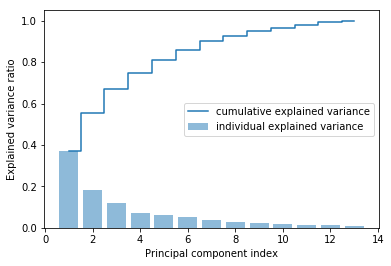

In [113]:
tot=sum(eigen_vals)
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
plt.bar(range(1,14),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,14),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [115]:
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda x: x[0],reverse=True)

In [116]:
w=np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
print('Matrix W:\n',w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [118]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [122]:
X_train_pca=X_train_std.dot(w)

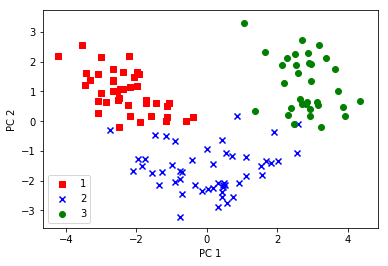

In [124]:
colors=['r','b','g']
markers=['s','x','o']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1],c=c,label=l,marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [137]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.6,c=cmap(idx),edgecolor='black',marker=markers[idx],label=cl)

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
lr=LogisticRegression()
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)
lr.fit(X_train_pca,y_train)

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

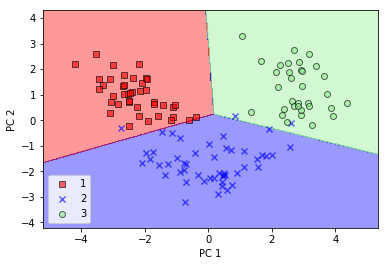

In [139]:
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

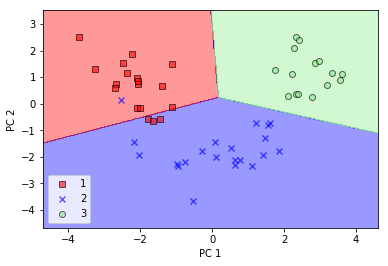

In [140]:
plot_decision_regions(X_test_pca,y_test,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [141]:
pca=PCA(n_components=None)
X_train_pca=pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [143]:
# LDA
np.set_printoptions(precision=4)
mean_vecs=[]
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0))
    print('MV %s: %s\n' % (label,mean_vecs[label-1]))

MV 1: [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]

MV 2: [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]

MV 3: [ 0.1992  0.866   0.1682  0.4148 -0.0451 -1.0286 -1.2876  0.8287 -0.7795
  0.9649 -1.209  -1.3622 -0.4013]



In [145]:
# calculate within-class scatter matrix Sw
d=13
S_W=np.zeros((d,d))
for label,mv in zip(range(1,4),mean_vecs):
    class_scatter=np.zeros((d,d))
    for row in X_train_std[y_train==label]:
        row,mv = row.reshape(d,1),mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter

In [149]:
print('Class label distribution:%s' % np.bincount(y_train)[1:])
# np.bincount  计算非负的int数组中每个值的出现次数

Class label distribution:[41 50 33]


In [165]:
d=13
S_W = np.zeros((d,d))
for label,mv in zip(range(1,4),mean_vecs):
    class_scatter=np.cov(X_train_std[y_train==label].T)
    S_W += class_scatter

In [166]:
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],S_W.shape[1]))

Scaled within-class scatter matrix: 13x13


In [172]:
# between-class scatter matrix
mean_overall=np.mean(X_train_std,axis=0)
d=13
S_B=np.zeros((d,d))
for i,mean_vec in enumerate(mean_vecs):
    n=X_train[y_train==i+1,:].shape[0]
    mean_vec=mean_vec.reshape(d,1)
    mean_overall=mean_overall.reshape(d,1)
    S_B += n*(mean_vec-mean_overall).dot((mean_vec-mean_overall).T)

In [176]:
print('Between-class scatter matrix:%sx%s' % (S_B.shape[0],S_B.shape[1]))

Between-class scatter matrix:13x13


In [177]:
# calculate SW**(-1)SB
eigen_vals,eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [178]:
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]

In [182]:
eigen_pairs=sorted(eigen_pairs,key=lambda x:x[0],reverse=True)

In [188]:
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

349.6178089059939
172.76152218979388
3.7853134512521556e-14
2.117398448224407e-14
1.5164618894178885e-14
1.5164618894178885e-14
1.3579567140455979e-14
1.3579567140455979e-14
7.587760371654683e-15
5.906039984472233e-15
5.906039984472233e-15
2.256441978569674e-15
0.0


In [192]:
tot = sum(eigen_vals.real)
discr=[(i/tot) for i in sorted(eigen_vals.real,reverse=True)]
cum_discr=np.cumsum(discr)

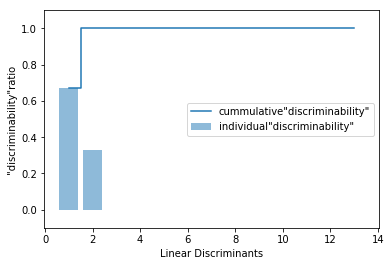

In [198]:
plt.bar(range(1,14),discr,alpha=0.5,align='center',label='individual"discriminability"')
plt.step(range(1,14),cum_discr,where='mid',label='cummulative"discriminability"')
plt.ylabel('"discriminability"ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1,1.1])
plt.legend(loc='best')
plt.show()

In [199]:
w=np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real))
print('Matrix W:\n',w)

Matrix W:
 [[-0.1481 -0.4092]
 [ 0.0908 -0.1577]
 [-0.0168 -0.3537]
 [ 0.1484  0.3223]
 [-0.0163 -0.0817]
 [ 0.1913  0.0842]
 [-0.7338  0.2823]
 [-0.075  -0.0102]
 [ 0.0018  0.0907]
 [ 0.294  -0.2152]
 [-0.0328  0.2747]
 [-0.3547 -0.0124]
 [-0.3915 -0.5958]]


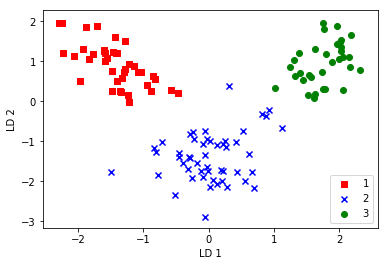

In [214]:
X_train_lda = X_train_std.dot(w)
colors=['r','b','g']
markers=['s','x','o']
for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_lda[y_train==l,0],X_train_lda[y_train==l,1] * (-1),c=c,label=l,marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.show()

In [216]:
# LDA via scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
lda=LDA(n_components=2)
X_train_lda=lda.fit_transform(X_train_std,y_train)

lr=LogisticRegression()
lr=lr.fit(X_train_lda,y_train)

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


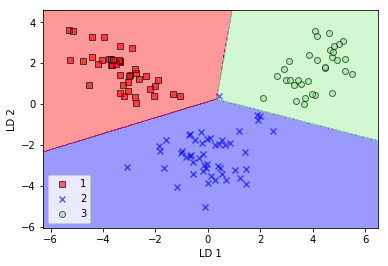

In [217]:
plot_decision_regions(X_train_lda,y_train,classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

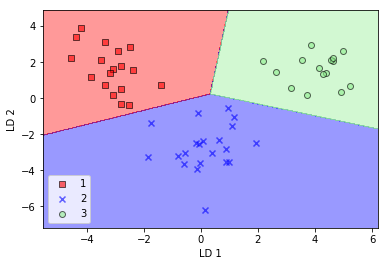

In [218]:
X_test_lda=lda.transform(X_test_std)
plot_decision_regions(X_test_lda,y_test,classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()